# Project Title

#### Predict the price of the house using its multiple features of house.

# Goal of the Project

#### Predict the price of the house by its features.If you are a buyer or seller of the house but you don't know the exact price of the house, So Supervised Machine Learning Regression Algorithms can help you to predict the price of the house just providing features of the target house. 

# Roles and Responsibilities

#### 1. Undestand, analyze and interpret large dataset.

#### 2. To discover trends and patterns, combine various algorithms and modules.

#### 3. Present data using various data visualization techniques and tools.

#### 4. Develop advance programs to extract the data needed, prepare the data for further analysis.


# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score


C:\Users\Reuare\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Dataset

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print('Shape of the train: ', df_train.shape)
print('Shape of the test: ', df_test.shape)

Shape of the train:  (1460, 81)
Shape of the test:  (1459, 80)


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Know Your Data

# Data Integration

In [5]:
df = pd.concat([df_train, df_test])
print('Shape of integrated Data / DF: ', df.shape)

Shape of integrated Data / DF:  (2919, 81)


In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# Get the Brief Information of the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [8]:
int_features = df.select_dtypes(include=['int64']).columns
print('Total number of Integer feautres:',int_features.shape[0])

print('Integer feature names: ', int_features.tolist())

Total number of Integer feautres: 26
Integer feature names:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [9]:
float_features = df.select_dtypes(include=['float64']).columns
print('Total number of float feautres:',float_features.shape[0])

print('float feature names: ', float_features.tolist())

Total number of float feautres: 12
float feature names:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [10]:
cat_features = df.select_dtypes(include=['object']).columns
print('Total number of Categorical feautres:',cat_features.shape[0])

print('Categorical feature names: ', cat_features.tolist())

Total number of Categorical feautres: 43
Categorical feature names:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# Get the Statistical Information of Numerical Features

In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [12]:
df.describe().shape

(8, 38)

# Handling Missing Value

## Visulaize Null / Missing Value

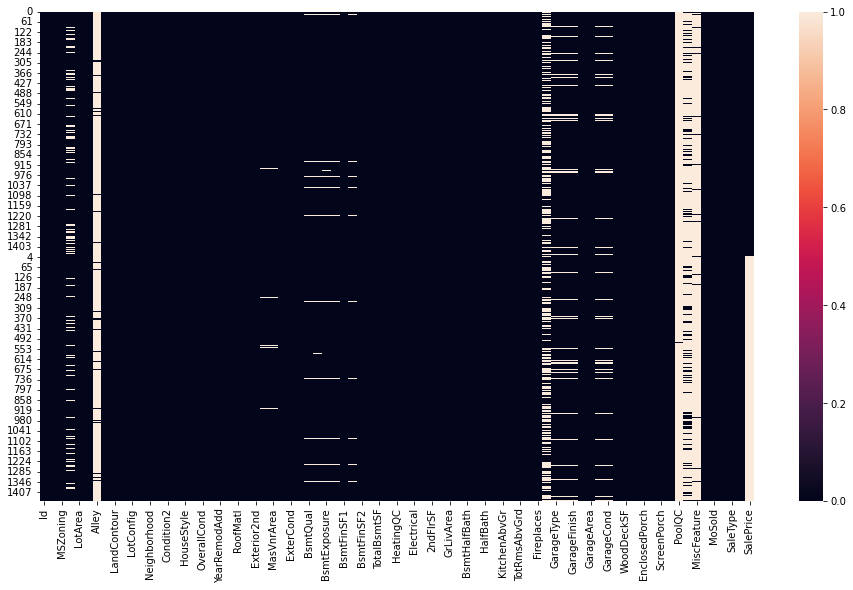

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig('Missing_value_heatmap')

## Get the Null Value Percentage for every Feature

In [14]:
# Set index as Id column
df = df.set_index('Id')

In [15]:
null_count = df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [16]:
null_percent = df.isnull().sum() / df.shape[0] * 100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

# Drop Columns / Features

As per Observation we will not drop any Feature from Dataset

In [17]:
Miss_value_50_percent = null_percent[null_percent > 50]
Miss_value_50_percent

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [18]:
df['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [19]:
Miss_value_20_50_percent = null_percent[(null_percent > 20) & (null_percent < 51)]
Miss_value_20_50_percent                               

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [20]:
Miss_value_5_20_percent = null_percent[(null_percent > 5) & (null_percent < 21)]
Miss_value_5_20_percent

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

<AxesSubplot:ylabel='Id'>

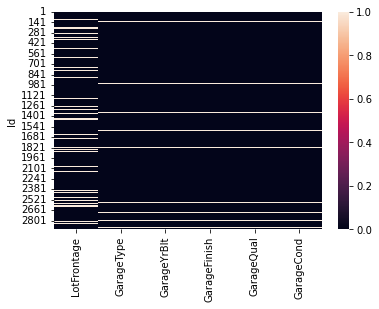

In [21]:
sns.heatmap(df[Miss_value_5_20_percent.keys()].isnull())

# Missing Value Imputation

In [22]:
Missing_value_feature = null_percent[null_percent > 0]
print('Total Missing value Features: ',len(Missing_value_feature))

Total Missing value Features:  35


In [23]:
Missing_value_feature

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [24]:
Missing_value_feature.keys().isin(cat_features)

array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False])

In [25]:
cat_na_feature = Missing_value_feature[Missing_value_feature.keys().isin(cat_features)]
print('Total Number of Categorical Missing Feature: ', len(cat_na_feature))
cat_na_feature

Total Number of Categorical Missing Feature:  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [26]:
int_na_feature = Missing_value_feature[Missing_value_feature.keys().isin(int_features)]
print('Total Number of Integer Missing Feature: ', len(int_na_feature))
int_na_feature

Total Number of Integer Missing Feature:  0


Series([], dtype: float64)

In [27]:
float_na_feature = Missing_value_feature[Missing_value_feature.keys().isin(float_features)]
print('Total Number of Float Missing Feature: ', len(float_na_feature))
float_na_feature

Total Number of Float Missing Feature:  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

## Handling MSZoning = 0.137033

In [28]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

C:\Users\Reuare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

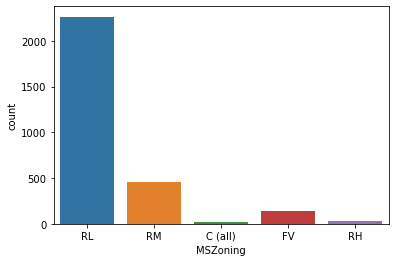

In [29]:
sns.countplot(df['MSZoning'])

In [30]:
# Backup of Original Data
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [31]:
mszoning_mode = df['MSZoning'].mode()[0]
df_mvi['MSZoning'].replace(np.nan, mszoning_mode, inplace=True)
df_mvi['MSZoning'].isnull().sum()

0

In [32]:
def OldNewCountPlot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(df[feature])
    plt.title('Old Data Ditribution')
    plt.subplot(122)
    sns.countplot(df_new[feature])
    plt.title('New Data Ditribution')

C:\Users\Reuare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reuare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


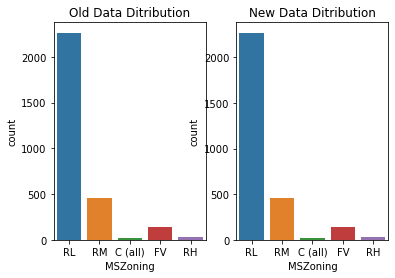

In [33]:
OldNewCountPlot(df, df_mvi, 'MSZoning')

## Handling Alley = 93.216855

In [34]:
df['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [35]:
alley_cont = 'NA'
df_mvi['Alley'].replace(np.nan, alley_cont, inplace=True)
df_mvi['Alley'].isnull().sum()

0

C:\Users\Reuare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reuare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


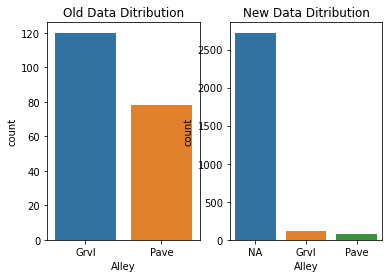

In [36]:
OldNewCountPlot(df, df_mvi, 'Alley')

# Handling LotFrontage = 16.649538

In [37]:
def BoxHistPlot(df, figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.distplot(df)

C:\Users\Reuare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reuare\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


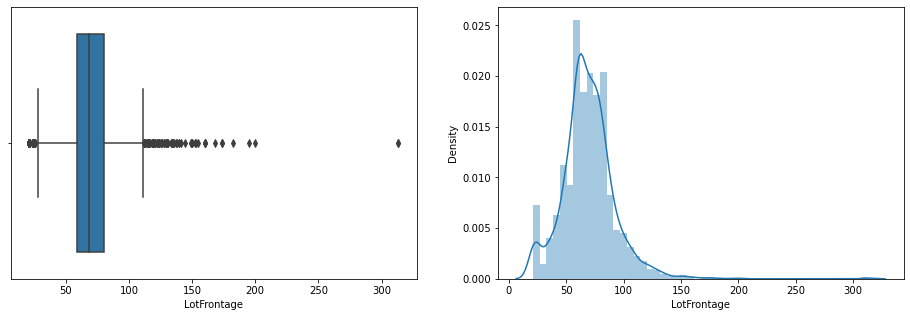

In [38]:
BoxHistPlot(df['LotFrontage'])

In [39]:
LotFrontage_mean = df['LotFrontage'].mean()
df_mvi['LotFrontage'].replace(np.nan, LotFrontage_mean, inplace=True)
df_mvi['LotFrontage'].isnull().sum()

0

In [40]:
def OldNewBoxHistPlot(df, df_new, feature, figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title('Old Data Distribution')
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title('Old Data Distribution')
    
    plt.subplot(223)
    sns.boxplot(df[feature])
    plt.title('New Data Distribution')
    plt.subplot(224)
    sns.distplot(df[feature])
    plt.title('New Data Distribution')

C:\Users\Reuare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reuare\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reuare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.wa

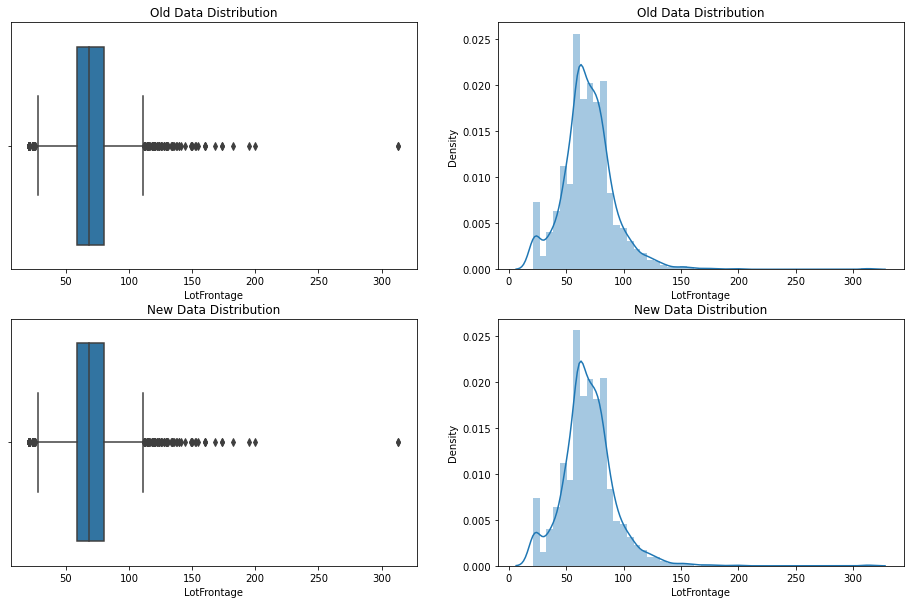

In [41]:
OldNewBoxHistPlot(df, df_mvi, 'LotFrontage')

## Handling Utilities = 0.068517

In [42]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [43]:
Utilities_mode = df['Utilities'].mode()[0]
df_mvi['Utilities'].replace(np.nan, Utilities_mode, inplace=True)
df_mvi['Utilities'].isnull().sum()

0

## Handling Exterior1st = 0.034258 and Exterior2nd = 0.034258

In [44]:
df['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [45]:
df['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [46]:
Exterior1st_mode = df['Utilities'].mode()[0]
Exterior2nd_mode = df['Utilities'].mode()[0]

df_mvi['Exterior1st'].replace(np.nan, Exterior1st_mode, inplace=True)
df_mvi['Exterior2nd'].replace(np.nan, Exterior2nd_mode, inplace=True)

print('E1st is null :', df_mvi['Exterior1st'].isnull().sum())
print('E2nd is null :',df_mvi['Exterior2nd'].isnull().sum())

E1st is null : 0
E2nd is null : 0


## Handling MasVnrType = 0.822199 and MasVnrArea = 0.787941

<AxesSubplot:ylabel='Id'>

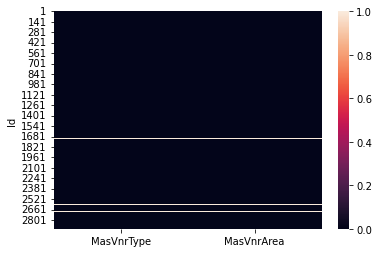

In [47]:
sns.heatmap(df[['MasVnrType', 'MasVnrArea']].isnull())

In [48]:
df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [49]:
MasVnrType_mode = df['MasVnrType'].mode()[0]
df_mvi['MasVnrType'].replace(np.nan, MasVnrType_mode, inplace=True)
df_mvi['MasVnrType'].isnull().sum()

0

C:\Users\Reuare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reuare\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


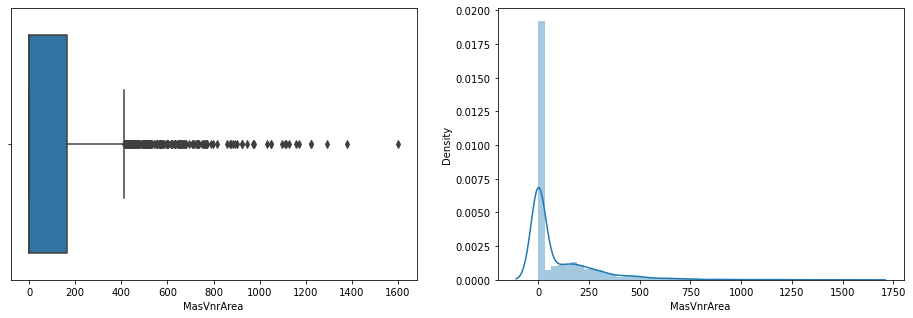

In [50]:
BoxHistPlot(df['MasVnrArea'])

In [51]:
MasVnrArea_cont = 'NA'
df_mvi['MasVnrArea'].replace(np.nan, MasVnrArea_cont, inplace=True)
df_mvi['MasVnrArea'].isnull().sum()

0

## Handling Basement Features

In [52]:
Cat_bsmt_feature = ['BsmtQual',    
'BsmtCond',   
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2']

Num_bsmt_feature = ['BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF' ,
'BsmtFullBath',
'BsmtHalfBath',]

<AxesSubplot:ylabel='Id'>

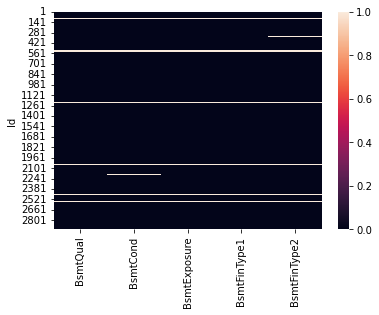

In [53]:
sns.heatmap(df[Cat_bsmt_feature].isnull())

In [54]:
for feat in Cat_bsmt_feature:
    print(f'Value count of {feat}: {df[feat].value_counts()}')

Value count of BsmtQual: TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Value count of BsmtCond: TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Value count of BsmtExposure: No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Value count of BsmtFinType1: Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Value count of BsmtFinType2: Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [55]:
bsmt_cont = 'NA'
for feat in Cat_bsmt_feature:
    df_mvi[feat].replace(np.nan, bsmt_cont, inplace=True)
    

In [56]:
df_mvi[Cat_bsmt_feature].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<AxesSubplot:ylabel='Id'>

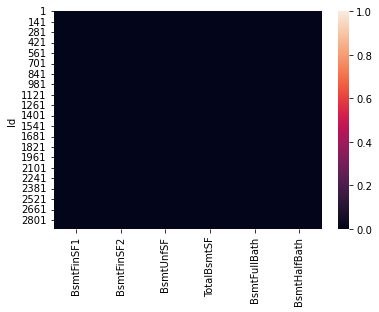

In [57]:
sns.heatmap(df[Num_bsmt_feature].isnull())

In [58]:
df_bsmt = df[Cat_bsmt_feature + Num_bsmt_feature]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
bsmt_num = 0
for feat in Num_bsmt_feature:
    df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)

In [60]:
df_mvi[Num_bsmt_feature].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

## Handling Electrical = 0.034258 and KitchenQual = 0.034258

In [61]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [62]:
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [63]:
df_ekk = df[['Electrical','KitchenQual','KitchenAbvGr']]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [64]:
Electrical_mode = df['Electrical'].mode()[0]
df_mvi['Electrical'].replace(np.nan, Electrical_mode, inplace=True)
df_mvi['Electrical'].isnull().sum()

0

In [65]:
KitchenQual_mode = df['KitchenQual'].mode()[0]
df_mvi['KitchenQual'].replace(np.nan, KitchenQual_mode, inplace=True)
df_mvi['KitchenQual'].isnull().sum()

0

## Handling remaining Categorical Features

In [66]:
df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [67]:
df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [68]:
Functional_mode = df['Functional'].mode()[0]
df_mvi['Functional'].replace(np.nan, Functional_mode, inplace=True)
df_mvi['Functional'].isnull().sum()

0

In [69]:
SaleType_mode = df['SaleType'].mode()[0]
df_mvi['SaleType'].replace(np.nan, SaleType_mode, inplace=True)
df_mvi['SaleType'].isnull().sum()

0

In [70]:
Other_Cat_Feature = ['FireplaceQu',
'PoolQC',  
'Fence',          
'MiscFeature']
for feat in Other_Cat_Feature:
    print(f'Value count of {feat}: {df[feat].value_counts()}')    

Value count of FireplaceQu: Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
Value count of PoolQC: Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
Value count of Fence: MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
Value count of MiscFeature: Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64


In [71]:
FireplaceQu_cont = 'NA'
df_mvi['FireplaceQu'].replace(np.nan, FireplaceQu_cont, inplace=True)
df_mvi['FireplaceQu'].isnull().sum()

0

In [72]:
PoolQC_cont = 'NA'
df_mvi['PoolQC'].replace(np.nan, PoolQC_cont, inplace=True)
df_mvi['PoolQC'].isnull().sum()

0

In [73]:
Fence_cont = 'NA'
df_mvi['Fence'].replace(np.nan, Fence_cont, inplace=True)
df_mvi['Fence'].isnull().sum()

0

In [74]:
MiscFeature_cont = 'NA'
df_mvi['MiscFeature'].replace(np.nan, MiscFeature_cont, inplace=True)
df_mvi['MiscFeature'].isnull().sum()

0

## Handling Garage Features

In [75]:
Cat_Garage_Feat = ['GarageType','GarageFinish','GarageQual','GarageCond']
Num_Garage_Feat = ['GarageYrBlt','GarageCars','GarageArea']

df_garage = df[Cat_Garage_Feat + Num_Garage_Feat]
df_garage[df_garage.isnull().any(axis=1)]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
Id,,,,,,,
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0
49,NaN,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,NaN,0.0,0.0
89,NaN,NaN,NaN,NaN,NaN,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0
100,NaN,NaN,NaN,NaN,NaN,0.0,0.0
109,NaN,NaN,NaN,NaN,NaN,0.0,0.0
126,NaN,NaN,NaN,NaN,NaN,0.0,0.0
128,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [76]:
Garage_cont = 'NA'
for feat in Cat_Garage_Feat:
    df_mvi[feat].replace(np.nan, Garage_cont, inplace=True)
    
df_mvi[Cat_Garage_Feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [77]:
Garage_cont = 0 
for feat in Num_Garage_Feat:
    df_mvi[feat].replace(np.nan, Garage_cont, inplace=True)
    
df_mvi[Num_Garage_Feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [78]:
df_mvi.isnull().any(axis=1).sum()

1459

# Feature Transformation

## Convert Numerical feature to Categorical Feature

In [79]:
for_num_conv = ['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
for feat in for_num_conv:
    print(f'{feat}: data type = {df_mvi[feat].dtype}')

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [80]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [81]:
df_mvi['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [82]:
calendar.month_abbr[12]

'Dec'

In [83]:
df_mvi['MoSold'] = df_mvi['MoSold'].apply(lambda x : calendar.month_abbr[x])
df_mvi['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [84]:
for feat in for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [85]:
for feat in for_num_conv:
    print(f'{feat}: data type = {df_mvi[feat].dtype}')

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


# Convert Categorical Features into Numerical Features

## Ordinal Encoding

In [86]:
ordinal_end_var = ['ExterQual',
                   'ExterCond',
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'BsmtFinSF1',
                    'HeatingQC',
                   'KitchenQual',
                    'GarageQual',
                   'FireplaceQu',
                   'GarageCond',
                   'PoolQC' ,
                   'Functional',
                   'PavedDrive' ,
                    'GarageFinish', 
                   'Utilities']             

In [87]:
len(ordinal_end_var)

18

In [88]:
print('Total number of Features to convert Ordinal Numerical Format: ', len(ordinal_end_var))

Total number of Features to convert Ordinal Numerical Format:  18


In [89]:
df_mvi['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [90]:
df_mvi['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [91]:
df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(CategoricalDtype(categories=['Po','Fa','Ta','Gd','Ex'], ordered=True)).cat.codes

In [92]:
df_mvi['ExterQual'].value_counts()

-1    1798
 3     979
 4     107
 1      35
Name: ExterQual, dtype: int64

In [93]:
df_mvi['ExterQual'].unique()

array([ 3, -1,  4,  1], dtype=int8)

In [94]:
df_mvi['BsmtFinType1'] = df['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtFinType2'] = df['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtQual'] = df['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterQual'] = df['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterCond'] = df['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['Functional'] = df['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_mvi['GarageCond'] = df['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageQual'] = df['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageFinish'] = df['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_mvi['HeatingQC'] = df['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['KitchenQual'] = df['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['PavedDrive'] = df['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_mvi['Utilities'] = df['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes
df_mvi['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['FireplaceQu'] = df['FireplaceQu'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['PoolQC'] = df['PoolQC'].astype(CategoricalDtype(categories=['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['BsmtExposure'] = df['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'No', 'mn', 'Av', 'Gd'], ordered = True)).cat.codes


In [95]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## One Hot Encoding for Nominal Categorical Data

In [96]:
df_encod = df_mvi.copy()

object_feature = df_encod.select_dtypes(include='object').columns.tolist()
print('Total object datatype features: ', len(object_feature))

print('Object Features: ', object_feature)

Total object datatype features:  33
Object Features:  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [97]:
df_encod[object_feature].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,GasA,Y,SBrkr,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,GasA,Y,SBrkr,Attchd,1976.0,NA,NA,May,2007,WD,Normal


In [98]:
print('Shape of DF before Encoding: ', df_encod.shape)
df_encod = pd.get_dummies(df_encod,
                          columns=object_feature, 
                          prefix=object_feature ,
                          drop_first=True)
print('Shape of DF after Encoding: ', df_encod.shape)

Shape of DF before Encoding:  (2919, 80)
Shape of DF after Encoding:  (2919, 958)


In [99]:
df_encod.head(2)

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemo

In [100]:
df_encod.select_dtypes(include='object').columns.tolist()

[]

# Split Data for Traning and Testing

In [101]:
df_encod.shape

(2919, 958)

In [102]:
len_train = df_train.shape[0]
len_train

1460

In [103]:
X_train = df_encod[:len_train].drop('SalePrice',axis=1)
y_train = df_encod['SalePrice'][:len_train]
X_test = df_encod[len_train:].drop('SalePrice',axis=1)

print('Shape of X_train data: ',  X_train.shape)
print('Shape of y_train data: ',  y_train.shape)
print('Shape of X_test data: ',  X_test.shape)


Shape of X_train data:  (1460, 957)
Shape of y_train data:  (1460,)
Shape of X_test data:  (1459, 957)


# Feature Scaling

In [104]:
sc = StandardScaler()
sc.fit(X_train)
# formula : z = (x-u)/s

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Train ML Model

In [105]:
lr = LinearRegression()
sgdr = SGDRegressor()
svr = SVR()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
mlpr = MLPRegressor()

In [106]:
models = {'a' : ['LinearRegression', lr],
          'b' : ['SGDRegressor', sgdr],
          'c' : ['SVR', svr],
          'd' : ['KNeighborsRegressor', knr],
          'e' : ['GaussianProcessRegressor', gpr],
          'f' : ['DecisionTreeRegressor', dtr],
          'g' : ['GradientBoostingRegressor', gbr],
          'h' : ['RandomForestRegressor', rfr],
          'i' : ['MLPRegressor' , mlpr]
                                        }

In [107]:
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model , X_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [108]:
model_score = []
for model in models:
    print('Training model : ', models[model][0])
    score = test_model(models[model][1], X_train, y_train)
    print('Score of model : ', score)
    model_score.append([models[model][0], score[0]])

Training model :  LinearRegression
Score of model :  [-2.533295309271931e+26]
Training model :  SGDRegressor
Score of model :  [-23749.15367038007]
Training model :  SVR
Score of model :  [-0.052342367631724826]
Training model :  KNeighborsRegressor
Score of model :  [0.36634102550065195]
Training model :  GaussianProcessRegressor
Score of model :  [-5.398031442917398]
Training model :  DecisionTreeRegressor
Score of model :  [0.6653952085060029]
Training model :  GradientBoostingRegressor
Score of model :  [0.8767904064560017]
Training model :  RandomForestRegressor
Score of model :  [0.8454858860314324]
Training model :  MLPRegressor


C:\Users\Reuare\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Reuare\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Reuare\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Reuare\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Reuare\anaconda3\lib\site-packages\sklearn\neural_network\_

Score of model :  [-4.945191394314034]


C:\Users\Reuare\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [109]:
model_score

[['LinearRegression', -2.533295309271931e+26],
 ['SGDRegressor', -23749.15367038007],
 ['SVR', -0.052342367631724826],
 ['KNeighborsRegressor', 0.36634102550065195],
 ['GaussianProcessRegressor', -5.398031442917398],
 ['DecisionTreeRegressor', 0.6653952085060029],
 ['GradientBoostingRegressor', 0.8767904064560017],
 ['RandomForestRegressor', 0.8454858860314324],
 ['MLPRegressor', -4.945191394314034]]

# Hyperparameter Tuning 

## Hyperparameter Tuning of GradientBoostingRegressor

In [110]:
params = {'n_estimators':[500,1000,2000],
          'learning_rate':[.001,0.01,.1],
          'max_depth':[1,2,4],
          'subsample':[.5,.75,1],
          'random_state':[45]}

Rand_search = RandomizedSearchCV(estimator=gbr, param_distributions=params ,n_jobs=1,
                                cv = 5 )


Rand_search.fit(X_train, y_train)
Rand_search.best_score_

0.8932161373541663

## Hyperparameter Tuning of RandomForestRegressor

In [111]:
hyp = {'n_estimators' : np.arange(10,100),
       'max_depth' : np.arange(1,10),
       'min_samples_leaf' : np.arange(1,10),
       'min_samples_split' : np.arange(2,10),
       'criterion' : ["squared_error", "absolute_error", "poisson"]}

rscv = RandomizedSearchCV(rfr, hyp, cv = 5)
rscv.fit(X_train,y_train)
rscv.best_score_

0.8391873347030853

# Feature Engineering / Selection to improve Accuracy

<AxesSubplot:>

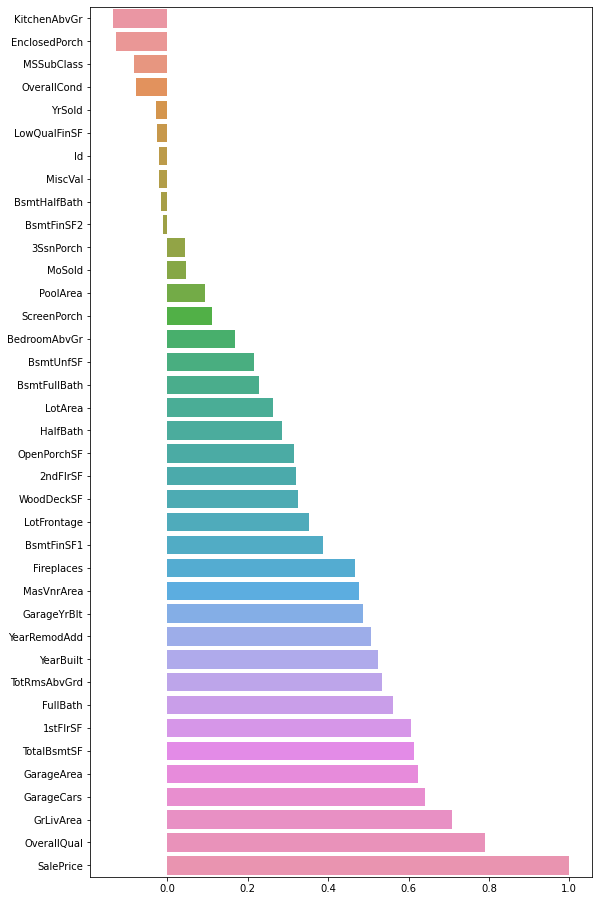

In [113]:
# correlation Barplot
plt.figure(figsize=(9,16))
corr_feat_series = pd.Series.sort_values(df_train.corrwith(df_train.SalePrice))
sns.barplot(x=corr_feat_series, y=corr_feat_series.index, orient='h')

In [115]:
df_back1 = df_encod

In [116]:
df_back1.to_csv('df_for_feature_engineering.csv', index=False)

In [117]:
list(corr_feat_series.index)

['KitchenAbvGr',
 'EnclosedPorch',
 'MSSubClass',
 'OverallCond',
 'YrSold',
 'LowQualFinSF',
 'Id',
 'MiscVal',
 'BsmtHalfBath',
 'BsmtFinSF2',
 '3SsnPorch',
 'MoSold',
 'PoolArea',
 'ScreenPorch',
 'BedroomAbvGr',
 'BsmtUnfSF',
 'BsmtFullBath',
 'LotArea',
 'HalfBath',
 'OpenPorchSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'LotFrontage',
 'BsmtFinSF1',
 'Fireplaces',
 'MasVnrArea',
 'GarageYrBlt',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'SalePrice']

# Save Model

In [127]:
import pickle

pickle.dump(Rand_search, open('model_save.csv', 'wb'))


In [128]:
model = pickle.load(open('model_save.csv', 'rb'))


In [134]:
model.predict(X_test)

array([123593.75841038, 161806.33653185, 185185.60861488, ...,
       163798.53606919, 114907.95577781, 208190.07950381])

In [137]:
test_model(model)

[0.881474799665048]